<h1> Creative Programming Assignment</h1>
    
This dataset contains information about the minimum salary, maximum salary, average salary, job description, age of the company in years, etc. offered in job descriptions on Glassdoor. 
It provides detailed information on the location, job title, upper and lower salary, as well as languages needed. This means that I can find out where the highest paying jobs are, who is paying them, and what people need to learn to work there.
    
https://www.kaggle.com/nikhilbhathi/data-scientist-salary-us-glassdoor
    
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib as py
from matplotlib import pyplot as plt

In [2]:
# Import data from .csv file
df = pd.read_csv('data_cleaned_2021.csv')
df
df.describe

<bound method NDFrame.describe of      index                                          Job Title  \
0        0                                     Data Scientist   
1        1                          Healthcare Data Scientist   
2        2                                     Data Scientist   
3        3                                     Data Scientist   
4        4                                     Data Scientist   
..     ...                                                ...   
737    950           Sr Scientist, Immuno-Oncology - Oncology   
738    951                               Senior Data Engineer   
739    952  Project Scientist - Auton Lab, Robotics Institute   
740    953                               Data Science Manager   
741    955          Research Scientist – Security and Privacy   

                 Salary Estimate  \
0     $53K-$91K (Glassdoor est.)   
1    $63K-$112K (Glassdoor est.)   
2     $80K-$90K (Glassdoor est.)   
3     $56K-$97K (Glassdoor est.)   
4    

In [3]:
list(df.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [4]:
list(df.columns)

['index',
 'Job Title',
 'Salary Estimate',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors',
 'Hourly',
 'Employer provided',
 'Lower Salary',
 'Upper Salary',
 'Avg Salary',
 'company_txt',
 'Job Location',
 'Age',
 'Python',
 'spark',
 'aws',
 'excel',
 'sql',
 'sas',
 'keras',
 'pytorch',
 'scikit',
 'tensor',
 'hadoop',
 'tableau',
 'bi',
 'flink',
 'mongo',
 'google_an',
 'job_title_sim',
 'seniority_by_title',
 'Degree']

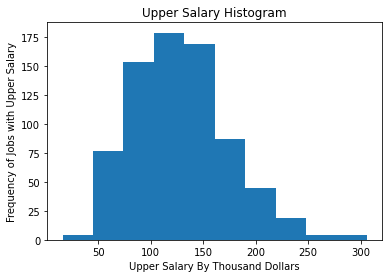

In [17]:
df["Upper Salary"].plot(kind ='hist', x = 'job_title_sim')

plt.title("Upper Salary Histogram")
plt.xlabel("Upper Salary By Thousand Dollars")
plt.ylabel("Frequency of Jobs with Upper Salary")
plt.show()

What position, on average earns the most?

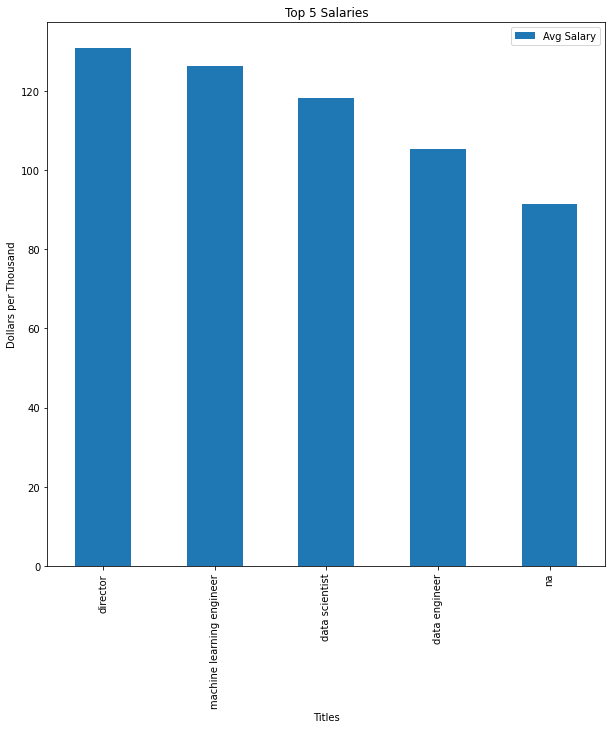

In [16]:
pivot = pd.pivot_table(df, values = ["Avg Salary"], index = ['job_title_sim'])
pivot
salPerPos = pivot.sort_values(by="Avg Salary", ascending = False).head(5)
salPerPos.plot.bar(figsize = (10,10))
plt.xticks(rotation=90)
plt.title("Top 5 Salaries")
plt.xlabel("Titles")
plt.ylabel("Dollars per Thousand")
plt.show()


What is the most common language needed amongst the highest earning jobs?

Discussion Cell #1

In this first chart, I wanted to analyze the data to find out what position is paid the most(On average). Thanks to Pandas, I was able to make a quick chart representing the average wages of different computer science positions. I found that the director positions has the largest salary on average. This makes the machine learning engineer and data_scientist, second and third respectively. The last bar which is labeled na, is actually all other positions that do not have the same title as every other job in the set. This could be variety of different jobs that don't fall into the category of any other positions. This means that there is a great incentive to reach for unique roles in companies.

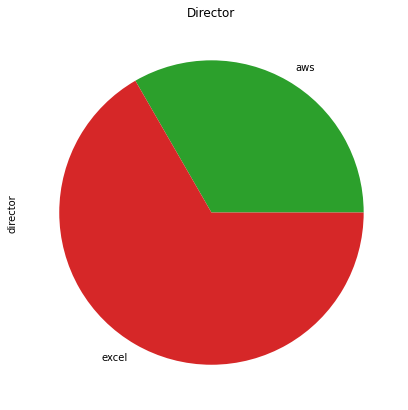

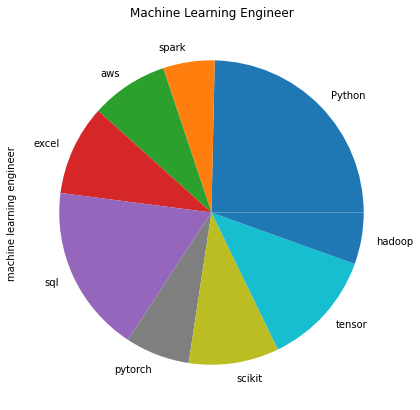

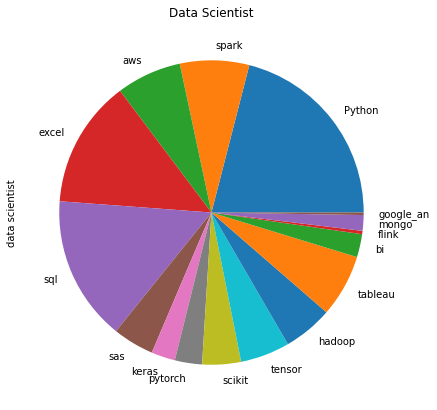

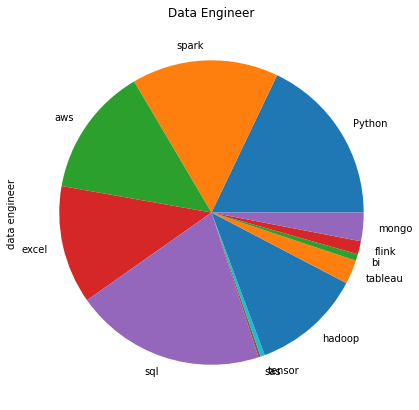

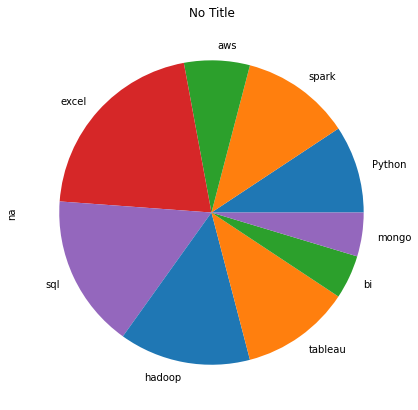

In [7]:
lan = df.groupby(by=["job_title_sim"]).mean()
lan = lan.sort_values(by="Avg Salary", ascending = False).head(5)
lan = lan.iloc[:5, 9:26]
lan
#lan

direc = lan.loc["director"]
direc.plot.pie(figsize =(7,7))
plt.title("Director")
plt.show()
mle = lan.loc["machine learning engineer"]
mle.plot.pie(figsize =(7,7))
plt.title("Machine Learning Engineer")
plt.show()
dsp = lan.loc["data scientist"]
dsp.plot.pie(figsize =(7,7))
plt.title("Data Scientist")
plt.show()
de = lan.loc["data engineer"]
de.plot.pie(figsize =(7,7))
plt.title("Data Engineer")
plt.show()
na = lan.loc["na"]
na.plot.pie(figsize =(7,7))
plt.title("No Title")
plt.show()

Discussion Cell #2

In this data, I wanted to find out what languages are the most commonly used in the highest paying jobs. We found the highest payig jobs in the last cell, so I used a pie chart to identify which language is most asked of from these positions. The positions actually have a large varience in terms of languages that they need to know to keep their pay. It puts into perspective how you might want to study excel and aws in order to find a director position which is the highest paying job on average in the set. The pie charts help break down what certain positions need most on average. I believe that these charts would be very handy for people like us who are studying computer science and hoping to bring their skills to the workspace. 